<a href="https://colab.research.google.com/github/praveenkumaresan/image-classification/blob/main/pk_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom CNN

In [32]:
import os
import shutil

# Path to the cache directory used by kagglehub
cache_directory = "/root/.cache/kagglehub"

# Check if the cache directory exists and delete it
if os.path.exists(cache_directory):
    shutil.rmtree(cache_directory)
    print("Cache cleared successfully.")
else:
    print("Cache directory not found.")


Cache cleared successfully.


In [33]:
import kagglehub

# Redownload the dataset using kagglehub
path = kagglehub.dataset_download("kausthubkannan/5-flower-types-classification-dataset")
print("Path to dataset files:", path)

# Function to print the directory structure
def print_directory_structure(directory):
    for root, dirs, files in os.walk(directory):
        level = root.replace(directory, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        sub_indent = ' ' * 4 * (level + 1)
        for file in files:
            print(f"{sub_indent}{file}")

# Print the directory structure of the entire dataset
print("\nDirectory structure of the dataset:")
print_directory_structure(path)


100%|██████████| 242M/242M [00:08<00:00, 29.2MB/s]

Extracting files...


Streaming output truncated to the last 5000 lines.
            615a625271.jpg
            19baafedef.jpg
            429ca100fb.jpg
            9668130a60.jpg
            686bce1df2.jpg
            0eacfc1224.jpg
            65562484db.jpg
            e9644acc02.jpg
            158bc67b8d.jpg
            6dc6216ca5.jpg
            65a963305a.jpg
            c6f0732f61.jpg
            0558743f7c.jpg
            6db95a54e1.jpg
            94e2ce4022.jpg
            4decd5bd76.jpg
            ee29538c0e.jpg
            843208c032.jpg
            b2f42bf397.jpg
            743fad3cbf.jpg
            5aca0c2081.jpg
            1cd604a35b.jpg
            c0b4f4df81.jpg
            6034288f9d.jpg
            fb8e4de2b7.jpg
            c7e186aa7d.jpg
            52517c827e.jpg
            faa7d1ea18.jpg
            f363b5a2a9.jpg
            ae6f46f0aa.jpg
            41cd4ccfdd.jpg
            ae8279215f.jpg
            e4720c3c74.jpg
            65ee300ef5.jpg
            00f5b32116.jpg
    

In [39]:
import os
import kagglehub

# Download the dataset using kagglehub
path = kagglehub.dataset_download("kausthubkannan/5-flower-types-classification-dataset")
print("Path to dataset files:", path)

# Function to print the directory structure
def print_directory_structure(directory):
    for root, dirs, files in os.walk(directory):
        level = root.replace(directory, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        sub_indent = ' ' * 4 * (level + 1)
        # for file in files:
        #     print(f"{sub_indent}{file}")

# Print the directory structure of the entire dataset
print("\nDirectory structure of the dataset:")
print_directory_structure(path)


Path to dataset files: /root/.cache/kagglehub/datasets/kausthubkannan/5-flower-types-classification-dataset/versions/1

Directory structure of the dataset:
1/
    train/
    test/
    flower_images/
        Tulip/
        Sunflower/
        Lotus/
        Orchid/
        Lilly/
    validation/


#### Split the dataset into test, training and validation

In [40]:
import os
import shutil
import random
import kagglehub

# Download the dataset using kagglehub
path = kagglehub.dataset_download("kausthubkannan/5-flower-types-classification-dataset")
print("Path to dataset files:", path)

# Set the path to the flower_images directory
flower_images_dir = os.path.join(path, "flower_images")
base_dir = path

# Automatically create paths for train, validation, and test directories
train_directory = os.path.join(base_dir, "train")
validation_directory = os.path.join(base_dir, "validation")
test_directory = os.path.join(base_dir, "test")

# Create directories for training, validation, and test sets
os.makedirs(train_directory, exist_ok=True)
os.makedirs(validation_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)

# Iterate over each class folder in flower_images
for class_name in os.listdir(flower_images_dir):
    class_dir = os.path.join(flower_images_dir, class_name)

    if os.path.isdir(class_dir):
        # Get a list of all image files in this class
        images = [file for file in os.listdir(class_dir) if file.lower().endswith(('.jpg', '.jpeg', '.png'))]
        random.shuffle(images)  # Shuffle the images randomly

        # Calculate the number of images for each split
        total_images = len(images)
        train_count = int(total_images * 0.7)
        validation_count = int(total_images * 0.2)

        # Create class directories in train, validation, and test folders
        os.makedirs(os.path.join(train_directory, class_name), exist_ok=True)
        os.makedirs(os.path.join(validation_directory, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_directory, class_name), exist_ok=True)

        # Split and copy images to the respective directories
        for i, image in enumerate(images):
            src_path = os.path.join(class_dir, image)
            if i < train_count:
                dest_path = os.path.join(train_directory, class_name, image)
            elif i < train_count + validation_count:
                dest_path = os.path.join(validation_directory, class_name, image)
            else:
                dest_path = os.path.join(test_directory, class_name, image)

            shutil.copy(src_path, dest_path)

# Function to count the number of images in a directory
def count_images_in_directory(directory):
    count = 0
    for root, _, files in os.walk(directory):
        count += len([file for file in files if file.lower().endswith(('.jpg', '.jpeg', '.png'))])
    return count

# Print the number of images in each directory
print("\nNumber of images in each directory:")
print("Train Directory:", count_images_in_directory(train_directory))
print("Validation Directory:", count_images_in_directory(validation_directory))
print("Test Directory:", count_images_in_directory(test_directory))


Path to dataset files: /root/.cache/kagglehub/datasets/kausthubkannan/5-flower-types-classification-dataset/versions/1

Number of images in each directory:
Train Directory: 3499
Validation Directory: 999
Test Directory: 501


#### Install necessary

In [9]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models

#### Load and Preprocess the Data

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_directory = train_directory
print('train ', train_directory)
validation_directory = validation_directory
print('validation ', validation_directory)

# Create data generators for loading and augmenting images
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values between 0 and 1
    rotation_range=20,  # Data augmentation: rotate images
    width_shift_range=0.2,  # Data augmentation: shift images horizontally
    height_shift_range=0.2,  # Data augmentation: shift images vertically
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom in/out
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill strategy for augmented images
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(150, 150),  # Resize images to a fixed size
    batch_size=32,
    class_mode='categorical'  # Use 'binary' if you have only two classes
)

validation_generator = validation_datagen.flow_from_directory(
    validation_directory,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


train  /root/.cache/kagglehub/datasets/kausthubkannan/5-flower-types-classification-dataset/versions/1/train
validation  /root/.cache/kagglehub/datasets/kausthubkannan/5-flower-types-classification-dataset/versions/1/validation
Found 3499 images belonging to 5 classes.
Found 999 images belonging to 5 classes.


#### Define Custom CNN Model

In [42]:
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output and add fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))  # Output layer for 5 classes


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use 'binary_crossentropy' for binary classification
    metrics=['accuracy']
)

In [47]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    #epochs=10, >> performance issues
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.6537 - loss: 0.8969 - val_accuracy: 0.7107 - val_loss: 0.7873
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 924us/step - accuracy: 0.7188 - loss: 0.7601 - val_accuracy: 0.5714 - val_loss: 0.8700
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.6745 - loss: 0.8293 - val_accuracy: 0.7228 - val_loss: 0.7355
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5312 - loss: 1.0097 - val_accuracy: 0.8571 - val_loss: 0.5831
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.6878 - loss: 0.8010 - val_accuracy: 0.7137 - val_loss: 0.7876


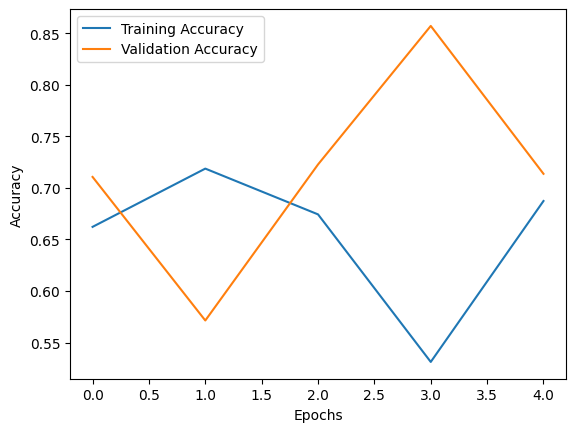

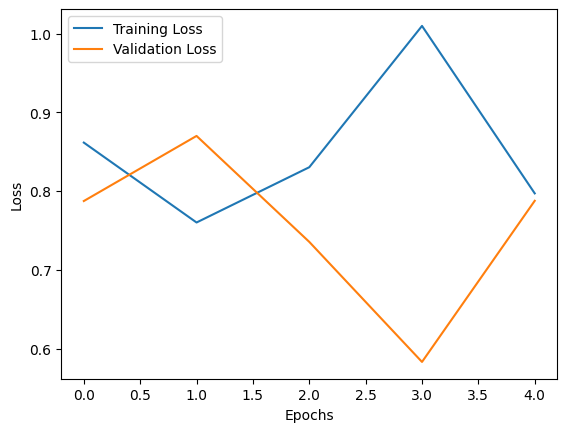

In [48]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
